## 📈Linear Regression Assignment

### 🟪Objective

This assignment is a programming assignment wherein you have to build a **multiple linear regression model** for the **prediction of demand for shared bikes**. You will need to submit a Jupyter notebook for the same. 

---

### 🤔Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to **understand the factors affecting the demand for these shared bikes in the American market**. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

---

### 🚲Business Goal
You are required to model the **demand for shared bikes with the available independent variables**. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly **manipulate the business strategy to meet the demand levels** and meet the customer's expectations. Further, the model will be a good way for management to **understand the demand dynamics** of a new market. 

---

### 1️⃣🔍Data understanding, preparation and EDA (25%):

✅Meets expectations
 - Data quality checks, if any, are performed, and all data quality issues are addressed in the right way. 
 - Explanations for data quality issues are clearly mentioned in comments.
 - Categorical variables are handled appropriately.
 - Dummy variables are created properly wherever applicable.
 - New metrics are derived if applicable and are used for analysis and modelling.
 - The data is converted to a clean format suitable for analysis.

❌Does not meet expectations
 - Data quality checks, if any, are not done, data quality issues are not addressed correctly to an appropriate level.
 - Categorical variables are not handled appropriately where required.
 - Dummy variables are not created properly.
 - New metrics are not derived or are not used for analysis.
 - The data is not converted to a clean format which is suitable for analysis or is not cleaned using commands.

#### 🪶Dataset Characteristics

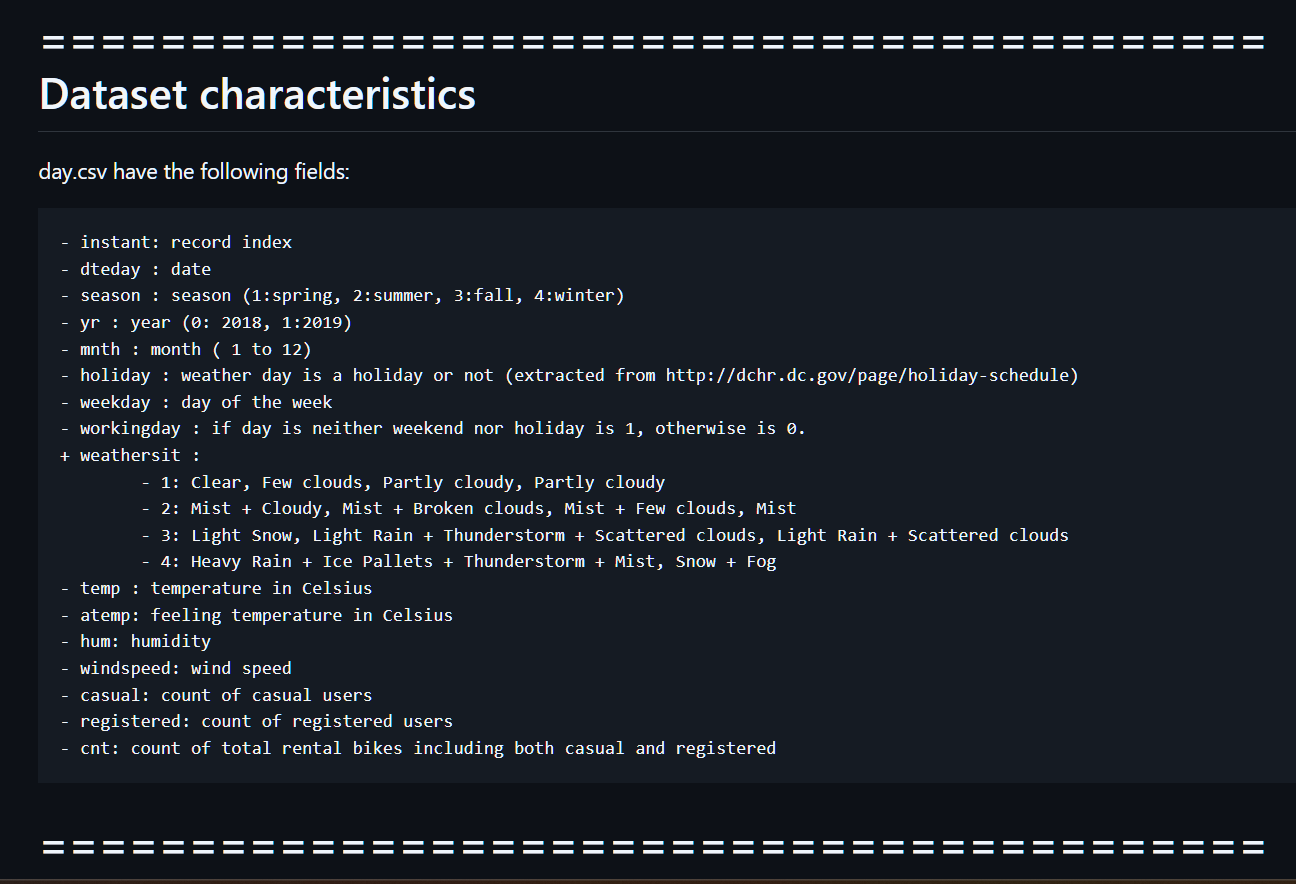

#### 📝Data Preparation

You can observe in the dataset that some of the variables like `weathersit` and `season` have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the [data dictionary](./3.1.BiketSharing-DataDictinary.md)). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the [data dictionary](./3.1.BiketSharing-DataDictinary.md) and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the *independent variables*.
 
You might notice the column `yr` with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column `yr` might be a **good variable for prediction**. So think twice before dropping it. 

#### 📚Import Libraries

In [1102]:
# Lets us do the necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression # for linear regression
import statsmodels.api as sm  

In [1103]:
import warnings
warnings.filterwarnings('ignore') # ignore all the warnings that show up in the notebook

#### ✂️ EDA - Toolkit

In [1104]:
class eda_toolkit:
    c_bikesharing_dataset_file = '3.1.BikeSharing-Dataset.csv'
    c_threshold = 0.4
    c_train_size = 0.7
    c_test_size = 0.3    
    c_category_unknown = 'Unknown'
    category_col_list = []
    non_category_col_list = []
    columns_to_drop=[]
    
    @staticmethod
    def get_missing_count(p_df):
        return p_df.isnull().sum().sort_values(ascending=False)   
    
    @staticmethod
    def get_missing_col_count(p_df,p_col):
        return p_df[p_col].isnull().sum()
    
    @staticmethod
    def reset_cols_to_drop():
        eda_toolkit.columns_to_drop = []
    
    @staticmethod
    def add_cols_to_drop(p_col,p_reason):
        eda_toolkit.columns_to_drop.append((p_col,p_reason))
        return eda_toolkit.columns_to_drop
    
    @staticmethod
    def get_cols_to_drop(p_only_col_names=True):
        if p_only_col_names:
            cols = [eda_toolkit.columns_to_drop[i][0] for i in range(len(eda_toolkit.columns_to_drop))]
            return cols
        else:
            return eda_toolkit.columns_to_drop   
        
    @staticmethod    
    def map_to_categorical(p_df,p_col,p_dict):
        return p_df[p_col].map(p_dict)         
        
    #For Visulation and Analysis
    @staticmethod
    def plt_category_count(p_df,p_col,p_type='v'):
        # plt.figure(figsize=[10,5])
        if p_type == 'v':
            p_df[p_col].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
        elif p_type == 'h':
            p_df[p_col].value_counts(normalize=True).sort_values(ascending=False).plot.barh()            
        plt.xlabel('Count')
        plt.ylabel(p_col)
        plt.title(f'Percentage of different {p_col}')

#### 🔃Load dataset Bikesharing-Dataset.csv

In [1105]:
bike_df = pd.read_csv(eda_toolkit.c_bikesharing_dataset_file)
bike_df.shape

(730, 16)

In [1106]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


 - 💡There are no missing values in the dataset and all columns have not null
 - 💡Except `dteday` all variables are of either int64/float64 type

In [1107]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1108]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### 🛠️Pre-Processing

##### Pre-Processing to drop the columns not required

###### Dropping `instant` columns as its a a sequence

In [1109]:
bike_df.drop(['instant'],axis=1,inplace=True)
eda_toolkit.add_cols_to_drop('instant','Its a sequence and not a feature variable')

[('instant', 'Its a sequence and not a feature variable')]

##### 🛠️Pre-Processing for `casual` and `registered` users and validating

In [1110]:
## Check whether sum of casual and registered is always equal to cnt

bike_df['cnt_is_equal'] = (bike_df['cnt'] == (bike_df['casual'] + bike_df['registered']))
print(bike_df['cnt_is_equal'].value_counts())

cnt_is_equal
True    730
Name: count, dtype: int64


In [1111]:
bike_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'cnt_is_equal'],
      dtype='object')

💡**Note**: The sum of `casual` + `registered` is always equal to `cnt`.

In [1112]:
## Dropping the `cnt_is_equal` column as its no more required
bike_df.drop(['cnt_is_equal'],axis=1,inplace=True)

##### 🛠️Pre-Processing & Visualize - Categorical Variables

###### `yr` to `yr_cat`

In [1113]:
year_dict = {0:'2018', 1:'2019'}
# bike_df.drop('yr_cat',axis=1,inplace=True)

bike_df['yr_cat'] = eda_toolkit.map_to_categorical(bike_df,'yr',year_dict)
eda_toolkit.category_col_list.append('yr_cat')

In [1114]:
bike_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'yr_cat'],
      dtype='object')

In [1115]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr_cat
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018


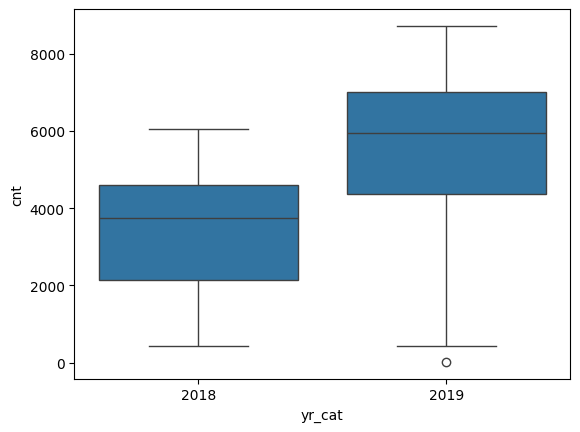

In [1116]:
#Season Category
sns.boxplot(x='yr_cat',y='cnt',data=bike_df)
plt.show()

💡 **2019** year shows significant rise in the rides compared to 2018

###### `season` to `season_cat`

In [1117]:
season_dict = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
# bike_df.drop('season_cat',axis=1,inplace=True)

bike_df['season_cat'] = eda_toolkit.map_to_categorical(bike_df,'season',season_dict)
eda_toolkit.category_col_list.append('season_cat')

In [1118]:
bike_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'yr_cat', 'season_cat'],
      dtype='object')

In [1119]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr_cat,season_cat
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,Spring
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,Spring
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,Spring
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,Spring
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,Spring


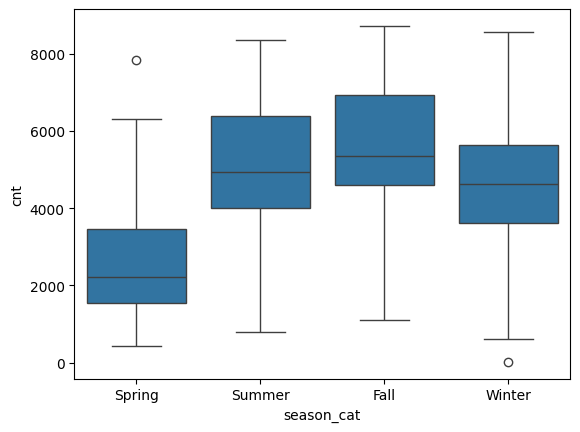

In [1120]:
#Season Category
sns.boxplot(x='season_cat',y='cnt',data=bike_df)
plt.show()

💡 **Fall season** seems to be most popular for bike riding

###### `mnth` to `mnth_cat`

In [1121]:
mnth_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
# bike_df.drop('mnth_cat',axis=1,inplace=True)

bike_df['mnth_cat'] = eda_toolkit.map_to_categorical(bike_df,'mnth',mnth_dict)
eda_toolkit.category_col_list.append('mnth_cat')

In [1122]:
bike_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'yr_cat', 'season_cat', 'mnth_cat'],
      dtype='object')

In [1123]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr_cat,season_cat,mnth_cat
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,Spring,Jan
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,Spring,Jan
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,Spring,Jan
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,Spring,Jan
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,Spring,Jan


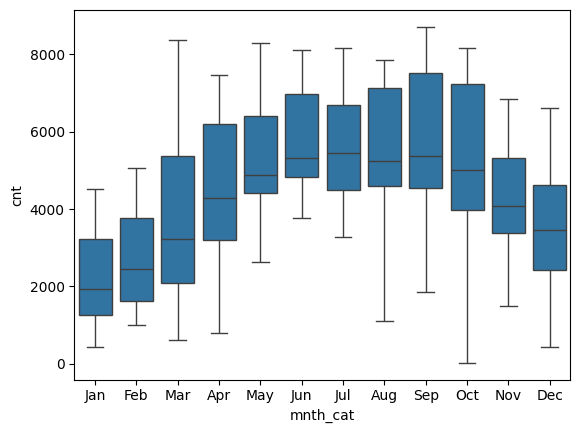

In [1124]:
#Month Category
sns.boxplot(x='mnth_cat',y='cnt',data=bike_df)
plt.show()

💡 **Sep, Oct, Nov** is popular among the riders

###### `weathersit` to `weathersit_cat`

In [1125]:
weathersit_dict = {1:'A', 2:'B', 3:'C', 4:'D'}
# bike_df.drop('weathersit_cat',axis=1,inplace=True)

bike_df['weathersit_cat'] = eda_toolkit.map_to_categorical(bike_df,'weathersit',weathersit_dict)
eda_toolkit.category_col_list.append('weathersit_cat')

In [1126]:
bike_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'yr_cat', 'season_cat', 'mnth_cat',
       'weathersit_cat'],
      dtype='object')

In [1127]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr_cat,season_cat,mnth_cat,weathersit_cat
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,Spring,Jan,B
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,Spring,Jan,B
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,Spring,Jan,A
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,Spring,Jan,A
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,Spring,Jan,A


In [1128]:
bike_df['weathersit_cat'].value_counts()

weathersit_cat
A    463
B    246
C     21
Name: count, dtype: int64

- 💡 **A** - **Clear, Few clouds, Partly cloudy, Partly cloudy** Weather is obviously *most popular* among the riders
- 💡 Whereas **C** - **Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds** is *least popular*

###### `holiday` to `holiday_cat`

In [1129]:
holiday_dict = {1:'Yes', 0:'No'}
# bike_df.drop('weathersit_cat',axis=1,inplace=True)

bike_df['holiday_cat'] = eda_toolkit.map_to_categorical(bike_df,'holiday',holiday_dict)
eda_toolkit.category_col_list.append('holiday_cat')

In [1130]:
bike_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'yr_cat', 'season_cat', 'mnth_cat',
       'weathersit_cat', 'holiday_cat'],
      dtype='object')

In [1131]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr_cat,season_cat,mnth_cat,weathersit_cat,holiday_cat
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,Spring,Jan,B,No
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,Spring,Jan,B,No
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,Spring,Jan,A,No
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,Spring,Jan,A,No
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,Spring,Jan,A,No


In [1132]:
bike_df['holiday_cat'].value_counts()

holiday_cat
No     709
Yes     21
Name: count, dtype: int64

###### `workingday` to `workingday_cat`

In [1133]:
workingday_dict = {1:'Not Holiday', 0:'Holiday'}
# bike_df.drop('weathersit_cat',axis=1,inplace=True)

bike_df['workingday_cat'] = eda_toolkit.map_to_categorical(bike_df,'workingday',workingday_dict)
eda_toolkit.category_col_list.append('workingday_cat')

In [1134]:
bike_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'yr_cat', 'season_cat', 'mnth_cat',
       'weathersit_cat', 'holiday_cat', 'workingday_cat'],
      dtype='object')

In [1135]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,windspeed,casual,registered,cnt,yr_cat,season_cat,mnth_cat,weathersit_cat,holiday_cat,workingday_cat
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,...,10.749882,331,654,985,2018,Spring,Jan,B,No,Not Holiday
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,...,16.652113,131,670,801,2018,Spring,Jan,B,No,Not Holiday
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,...,16.636703,120,1229,1349,2018,Spring,Jan,A,No,Not Holiday
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,...,10.739832,108,1454,1562,2018,Spring,Jan,A,No,Not Holiday
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,...,12.522300,82,1518,1600,2018,Spring,Jan,A,No,Not Holiday


In [1136]:
bike_df['workingday_cat'].value_counts()

workingday_cat
Not Holiday    504
Holiday        226
Name: count, dtype: int64

###### `weekday` to `weekday_cat`

In [1137]:
weekday_dict = {0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon'}
#bike_df.drop('weekday_cat',axis=1,inplace=True)
bike_df['weekday_cat'] = eda_toolkit.map_to_categorical(bike_df,'weekday',weekday_dict)
eda_toolkit.category_col_list.append('weekday_cat')

In [1138]:
bike_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'yr_cat', 'season_cat', 'mnth_cat',
       'weathersit_cat', 'holiday_cat', 'workingday_cat', 'weekday_cat'],
      dtype='object')

In [1139]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,casual,registered,cnt,yr_cat,season_cat,mnth_cat,weathersit_cat,holiday_cat,workingday_cat,weekday_cat
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,...,331,654,985,2018,Spring,Jan,B,No,Not Holiday,Wed
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,...,131,670,801,2018,Spring,Jan,B,No,Not Holiday,Thu
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,...,120,1229,1349,2018,Spring,Jan,A,No,Not Holiday,Fri
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,...,108,1454,1562,2018,Spring,Jan,A,No,Not Holiday,Sat
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,...,82,1518,1600,2018,Spring,Jan,A,No,Not Holiday,Sun


In [1140]:
bike_df['weekday_cat'].value_counts()

weekday_cat
Wed    105
Thu    105
Fri    104
Sat    104
Sun    104
Mon    104
Tue    104
Name: count, dtype: int64

In [1141]:
eda_toolkit.category_col_list

['yr_cat',
 'season_cat',
 'mnth_cat',
 'weathersit_cat',
 'holiday_cat',
 'workingday_cat',
 'weekday_cat']

##### 🛠️Preprocessing Convert dteday to dateime64

In [1142]:
bike_df['dteday_dt'] = pd.to_datetime(bike_df['dteday'],errors='coerce')
eda_toolkit.category_col_list.append('dteday_dt')

In [1143]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dteday          730 non-null    object        
 1   season          730 non-null    int64         
 2   yr              730 non-null    int64         
 3   mnth            730 non-null    int64         
 4   holiday         730 non-null    int64         
 5   weekday         730 non-null    int64         
 6   workingday      730 non-null    int64         
 7   weathersit      730 non-null    int64         
 8   temp            730 non-null    float64       
 9   atemp           730 non-null    float64       
 10  hum             730 non-null    float64       
 11  windspeed       730 non-null    float64       
 12  casual          730 non-null    int64         
 13  registered      730 non-null    int64         
 14  cnt             730 non-null    int64         
 15  yr_cat

In [1144]:
eda_toolkit.category_col_list

['yr_cat',
 'season_cat',
 'mnth_cat',
 'weathersit_cat',
 'holiday_cat',
 'workingday_cat',
 'weekday_cat',
 'dteday_dt']

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

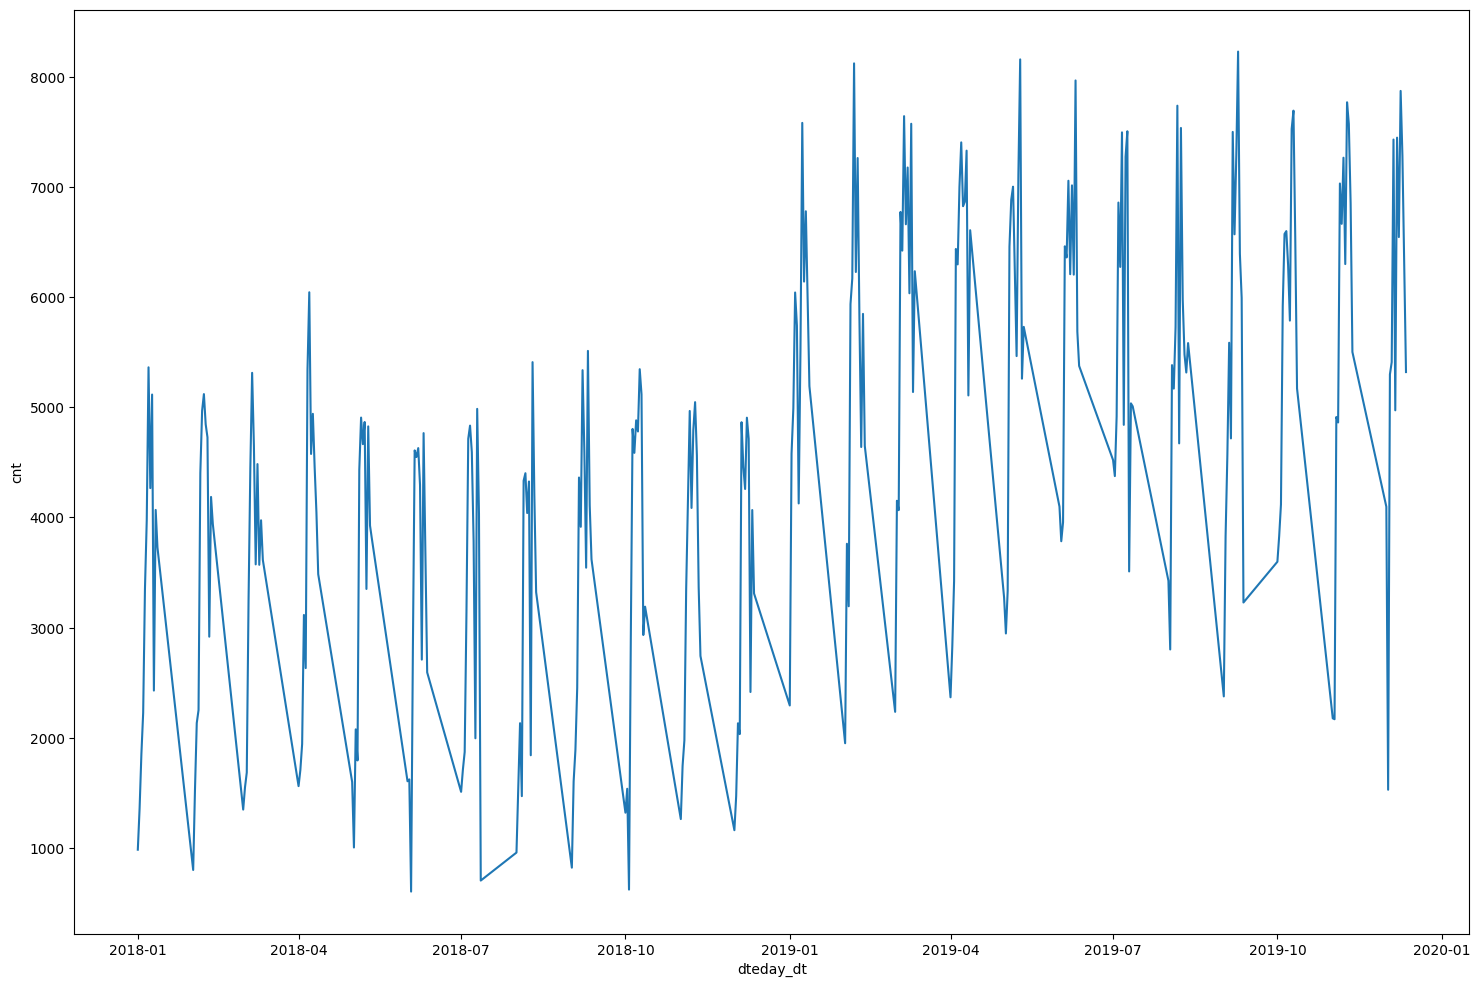

In [1145]:
plt.figure(figsize=[18,12])
sns.lineplot(x=bike_df['dteday_dt'],y=bike_df['cnt'])
plt.plot

##### Get Dummies to split the categorical variables

- `mnth_cat` -> `mnth_cat_status`

In [1146]:
mnth_cat_status = pd.get_dummies(bike_df['mnth_cat'], drop_first = True)
mnth_cat_status

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
725,False,True,False,False,False,False,False,False,False,False,False
726,False,True,False,False,False,False,False,False,False,False,False
727,False,True,False,False,False,False,False,False,False,False,False
728,False,True,False,False,False,False,False,False,False,False,False


- `season_cat` -> `season_cat_status`

In [1147]:
##### `season_cat`
season_cat_status = pd.get_dummies(bike_df['season_cat'], drop_first = True)
mnth_cat_status

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
725,False,True,False,False,False,False,False,False,False,False,False
726,False,True,False,False,False,False,False,False,False,False,False
727,False,True,False,False,False,False,False,False,False,False,False
728,False,True,False,False,False,False,False,False,False,False,False


In [1148]:
bike_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'yr_cat', 'season_cat', 'mnth_cat',
       'weathersit_cat', 'holiday_cat', 'workingday_cat', 'weekday_cat',
       'dteday_dt'],
      dtype='object')

In [1149]:
eda_toolkit.category_col_list

['yr_cat',
 'season_cat',
 'mnth_cat',
 'weathersit_cat',
 'holiday_cat',
 'workingday_cat',
 'weekday_cat',
 'dteday_dt']

In [1150]:
eda_toolkit.columns_to_drop

[('instant', 'Its a sequence and not a feature variable')]

In [1151]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dteday          730 non-null    object        
 1   season          730 non-null    int64         
 2   yr              730 non-null    int64         
 3   mnth            730 non-null    int64         
 4   holiday         730 non-null    int64         
 5   weekday         730 non-null    int64         
 6   workingday      730 non-null    int64         
 7   weathersit      730 non-null    int64         
 8   temp            730 non-null    float64       
 9   atemp           730 non-null    float64       
 10  hum             730 non-null    float64       
 11  windspeed       730 non-null    float64       
 12  casual          730 non-null    int64         
 13  registered      730 non-null    int64         
 14  cnt             730 non-null    int64         
 15  yr_cat

#### 📊Data Visualization

#### Univariate Analysis - Displot

In [1152]:
bike_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'yr_cat', 'season_cat', 'mnth_cat',
       'weathersit_cat', 'holiday_cat', 'workingday_cat', 'weekday_cat',
       'dteday_dt'],
      dtype='object')

In [1153]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,registered,cnt,yr_cat,season_cat,mnth_cat,weathersit_cat,holiday_cat,workingday_cat,weekday_cat,dteday_dt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,...,654,985,2018,Spring,Jan,B,No,Not Holiday,Wed,2018-01-01
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,...,670,801,2018,Spring,Jan,B,No,Not Holiday,Thu,2018-02-01
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,...,1229,1349,2018,Spring,Jan,A,No,Not Holiday,Fri,2018-03-01
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,...,1454,1562,2018,Spring,Jan,A,No,Not Holiday,Sat,2018-04-01
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,...,1518,1600,2018,Spring,Jan,A,No,Not Holiday,Sun,2018-05-01


###### `registered` and `casual`

[]

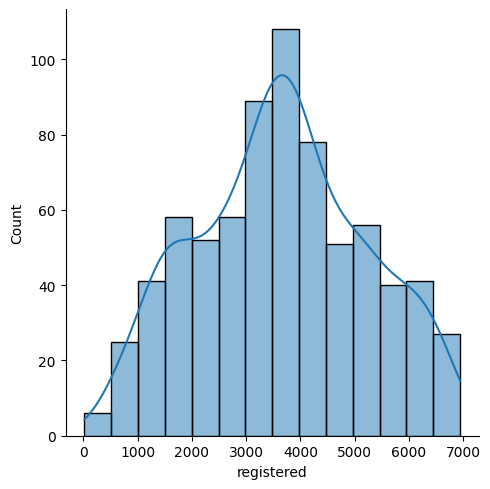

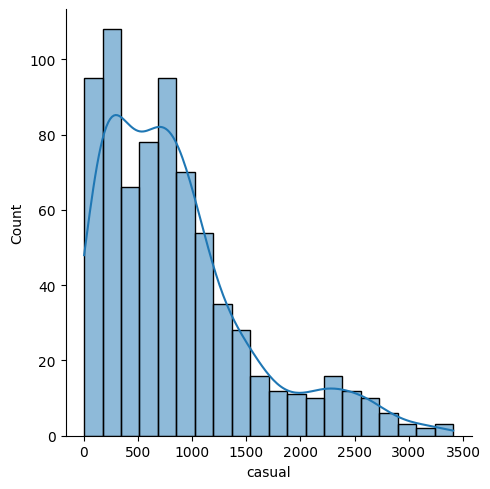

In [1154]:
# Registered
sns.displot(bike_df['registered'],kde=1)
sns.displot(bike_df['casual'],kde=1)
plt.plot()

💡`registered` users are showing a near normal distribution compared to `casual` users

###### temp

[]

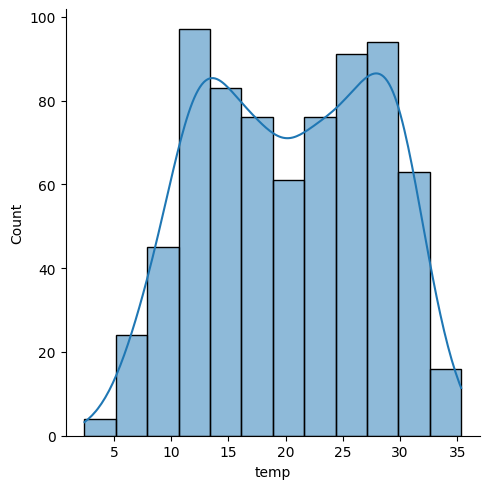

In [1155]:
# Temperature
sns.displot(bike_df['temp'],kde=1)
plt.plot()

###### season

[]

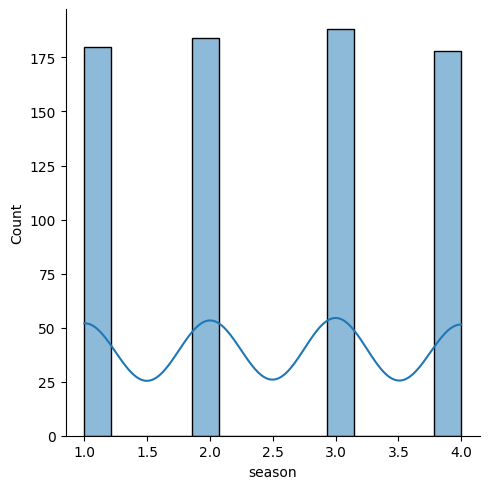

In [1156]:
# season
sns.displot(bike_df['season'],kde=1)
plt.plot()

###### mnth

[]

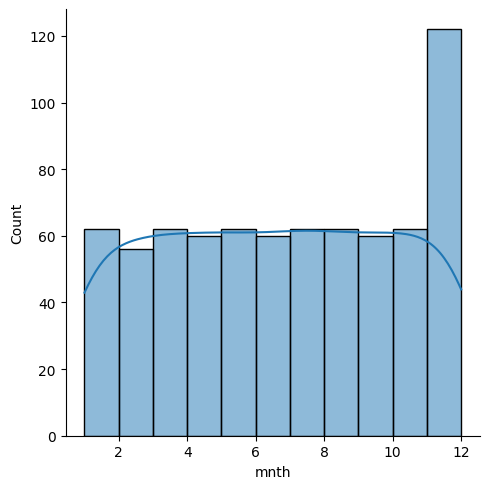

In [1157]:
# Month
sns.displot(bike_df['mnth'],kde=1)
plt.plot()

###### hum

[]

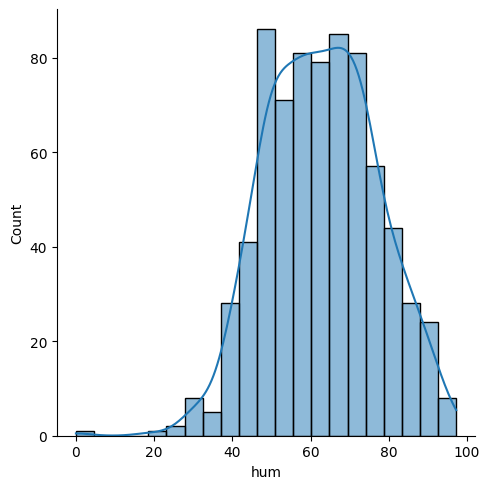

In [1158]:
# Humidity
sns.displot(bike_df['hum'],kde=1)
plt.plot()

###### windspeed

[]

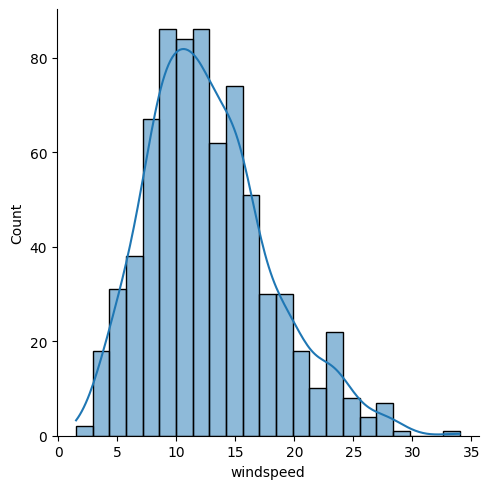

In [1159]:
# Windspeed
sns.displot(bike_df['windspeed'],kde=1)
plt.plot()

###### weathersit

[]

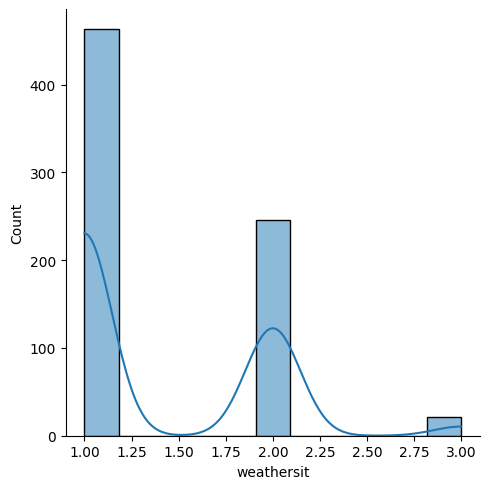

In [1160]:
# Weathersit
sns.displot(bike_df['weathersit'],kde=1)
plt.plot()

#### Bi-variate Analsis

<Figure size 2000x1500 with 0 Axes>

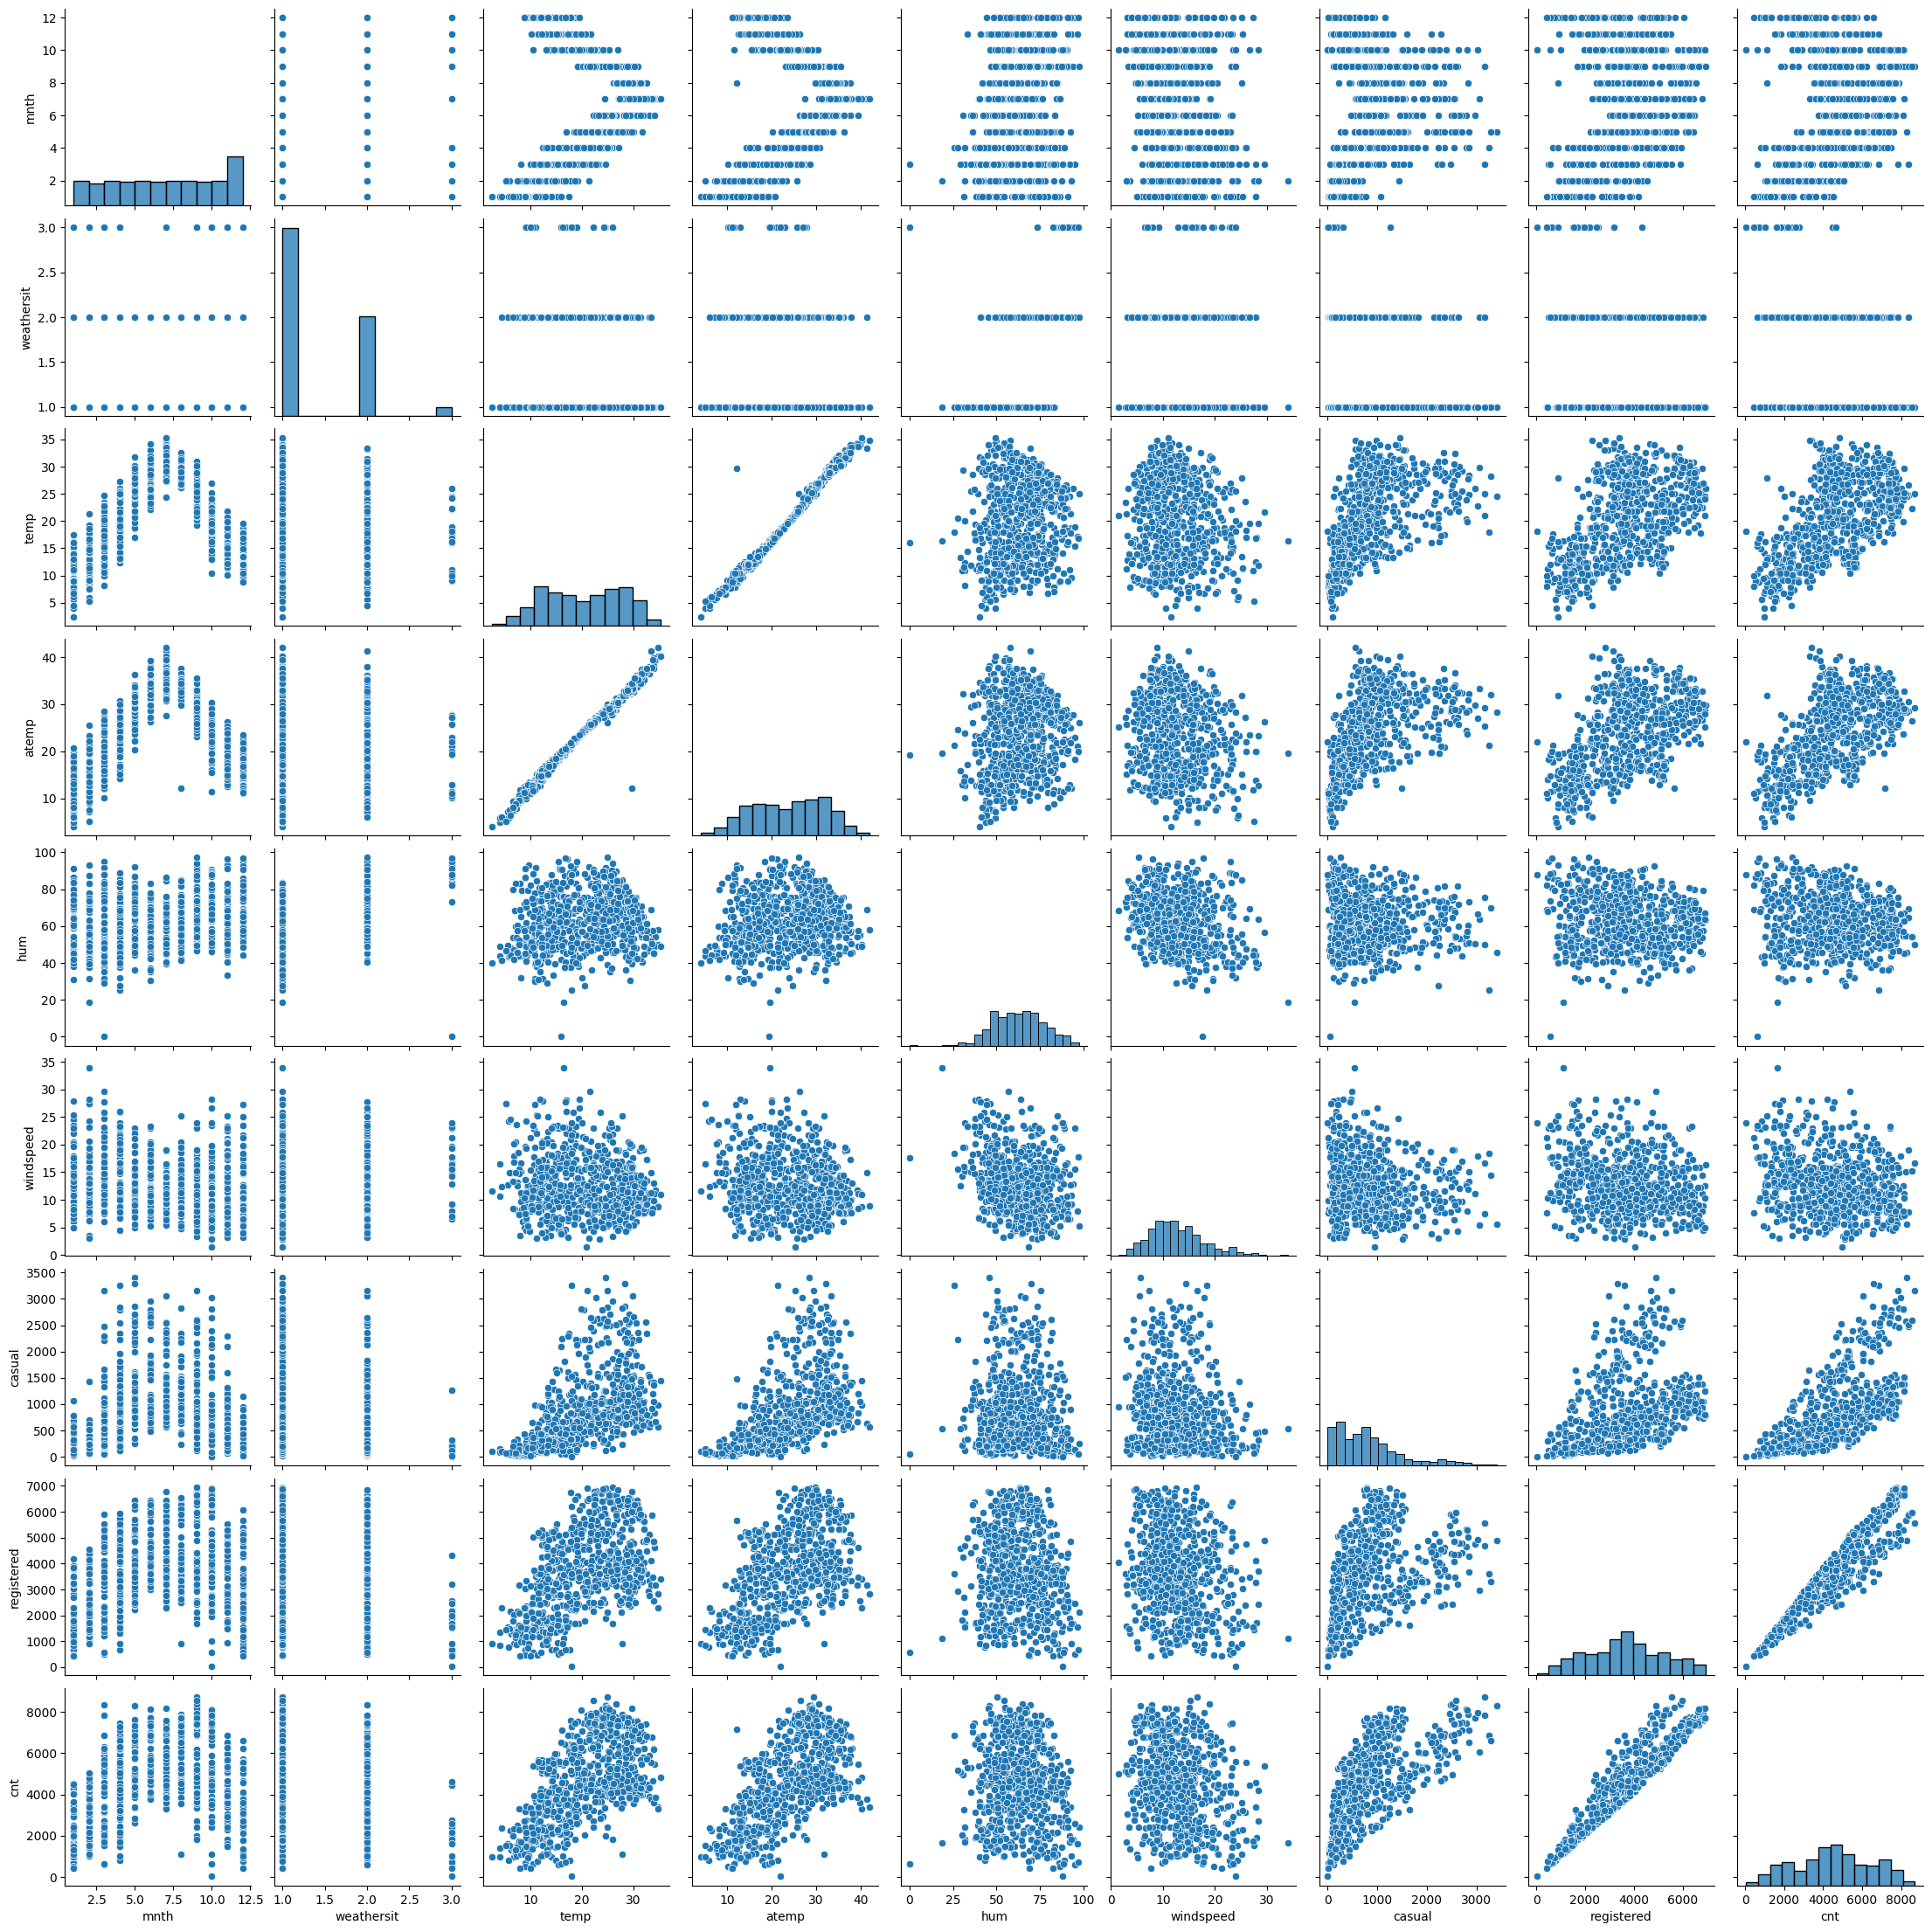

In [1161]:
## Temperature
plt.figure(figsize=[20,15])
sns.pairplot(bike_df.drop(['dteday','holiday','weekday','workingday','season','yr'],axis=1))
plt.show()

#### Multi-variate Analysis - Heatmap

💡To generate the heatmap, removed the columns `dteday` and `instant` from the dataset. Since one is a date column and other is an index column respectively. 

In [1162]:
corr_matrix = bike_df.corr(numeric_only=True)

In [1163]:
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))

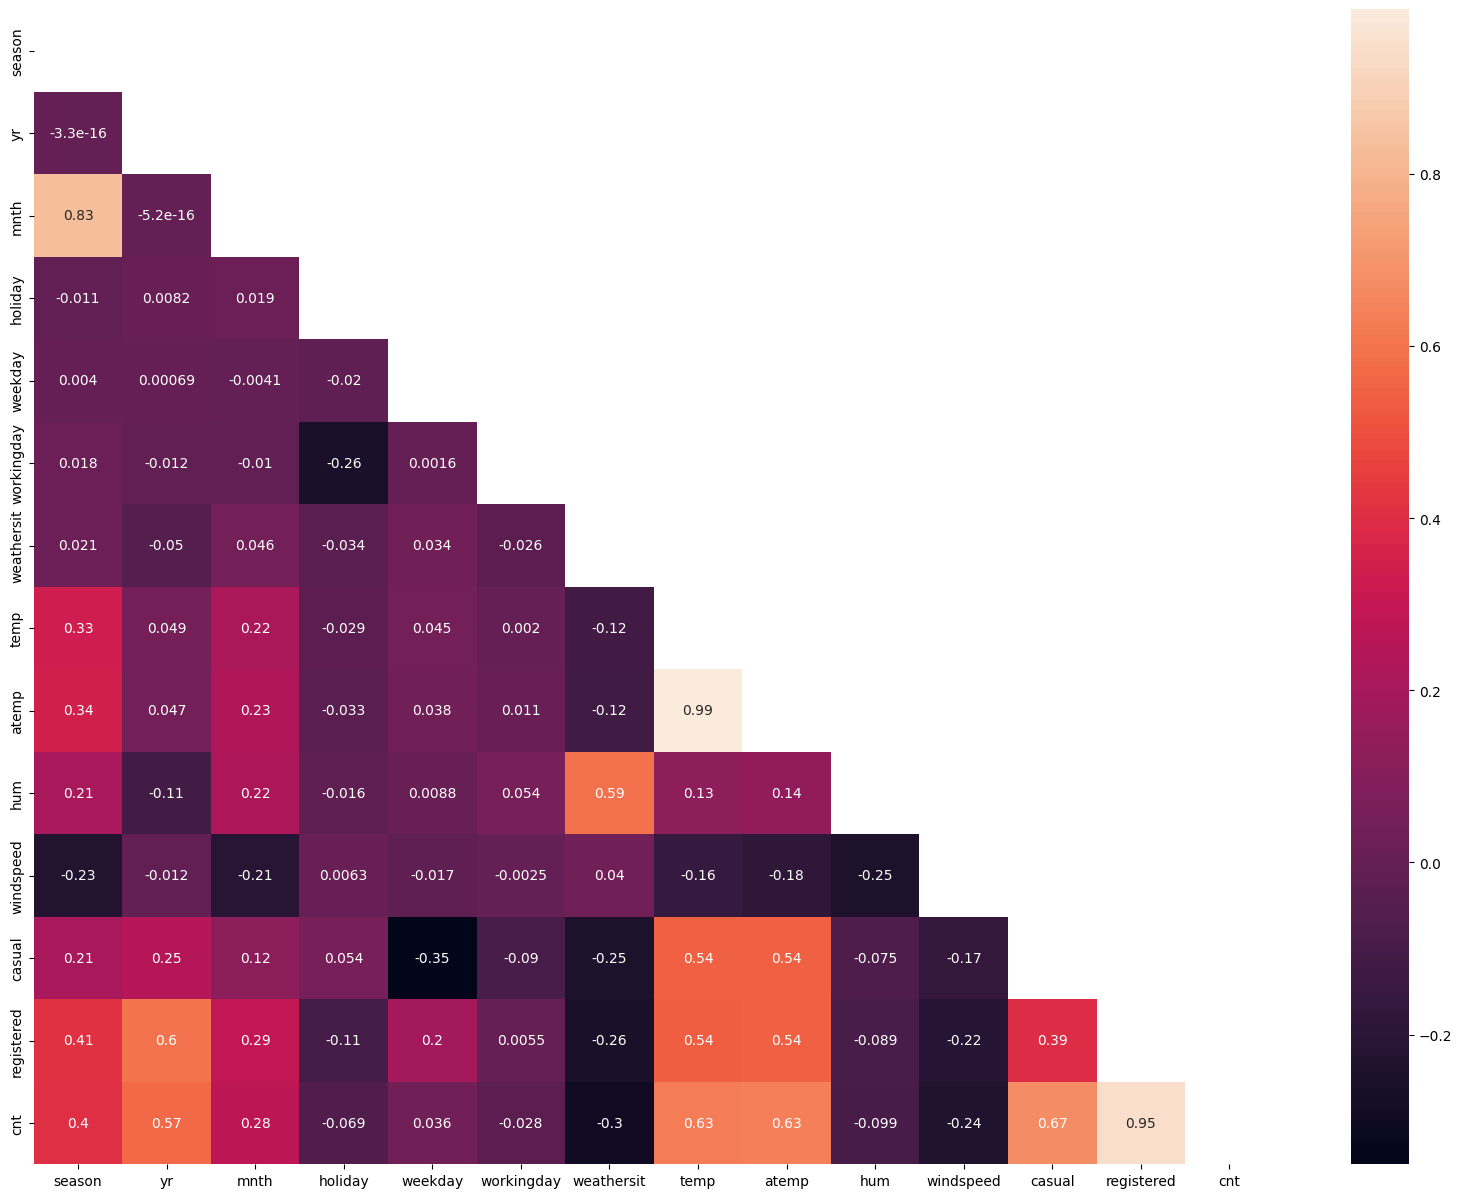

In [1164]:
plt.figure(figsize=[20,15])
sns.heatmap(corr_matrix,mask=mask, annot=True)
plt.show()

💡**Some Insights**
 - `Season` and `mnth` are highly positive correlated as again they are only representing same thing in different units
 - `temp` and `atemp` are highly positively correlative. Hence one of them can be considered to be dropped.
 - `
 - Contrarily, `weathersit` and `windspeed` are inversely correlated to 🎯target variable `cnt`
 - Similarly, `weathersit` and `windspeed` are inversely correlated to `registered` and `casual` user, Which indicates that most of the customers/riders prefer *pleasant weather*.

#### Dropping `atemp` columns as its same as `temp` but different unit to avoid multi-collinearity

In [1165]:
bike_df.drop(['atemp'],axis=1,inplace=True)
eda_toolkit.add_cols_to_drop('atemp','its collinear to temp variable')

[('instant', 'Its a sequence and not a feature variable'),
 ('atemp', 'its collinear to temp variable')]


---

### 2️⃣🧑‍💻Model building and evaluation (50%):

✅Meets expectations
 - Model parameters are tuned using correct principles and the approach is explained clearly. 
 - Both the technical and business aspects are considered while building the model. 
 - Correct variable selection techniques are used. A reasonable number of different models are attempted and the best one is chosen based on key performance metrics.
 - Residual analysis is performed after model building and the assumptions are validated.
 - Model evaluation is done using the correct principles and appropriate evaluation metrics are chosen.
 - The results are on par with the best possible model on the dataset.
 - The model is interpreted and explained correctly. The commented code includes a brief explanation of the important variables and the model in simple terms.

❌Does not meet expectations
 - Parameters are not tuned enough or tuned incorrectly. Relevant business aspects are not considered while model building.
 - Variable selection techniques are used incorrectly / not conducted. A variety of models are not considered or a sub-optimal one is finalised.
 - Residual analysis is not performed after model building and the assumptions are not validated.
 - The evaluation process deviates from correct model selection principles, inappropriate metrics are evaluated or are incorrectly evaluated.
 - The results are not on par with the best possible model on the dataset.
 - The model is not interpreted and explained correctly.

#### ⚙️🛠️Model Tookit

In [1166]:
class model_toolkit:
    c_train_size = 0.7
    c_test_size = 0.3   
    c_all_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed','cnt']
    columns_to_drop = []
    
    @staticmethod
    def add_cols_to_drop(p_col,p_reason):
        model_toolkit.columns_to_drop.append((p_col,p_reason))
        return model_toolkit.columns_to_drop
        
    @staticmethod
    def get_cols_to_drop(p_only_col_names=True):
        if p_only_col_names:
            cols = [model_toolkit.columns_to_drop[i][0] for i in range(len(model_toolkit.columns_to_drop))]
            return cols
        else:
            return model_toolkit.columns_to_drop   
        
    @staticmethod
    def get_model_ols_params(p_lr):
        print(p_lr.params) # Check the parameters obtained
    
    @staticmethod
    def check_VIF(p_X_train):        
        # Check for the VIF values of the feature variables. 
        import pandas as pd
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
        vif = pd.DataFrame()

        vif['Features'] = p_X_train.columns
        vif['VIF'] = [variance_inflation_factor(p_X_train.values, i) for i in range(p_X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        print(vif)

#### 2.1.🧑‍💻🏗️Model Building (25%):

In the dataset provided, you will notice that there are three columns named `casual`, `registered`, and `cnt`. 

 - The variable `casual` indicates the number **casual users** who have made a rental. 
 - The variable `registered` on the other hand shows the total number of **registered users** who have made a booking on a given day. 
 - Finally, the `cnt` variable indicates the total number of bike rentals, including both casual and registered. 
 
💡**Note**: The model should be built taking this 'cnt' as the target variable.

##### 💡📝**Note**: `casual` + `registered` is `cnt` and showing high degree of correlation. Therefore, it would be prudent to see the impact of other factors and features on 🎯 target variable - `cnt`

##### Manual Feature Elimination - Top-Down Approach

In [1167]:
bike_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'yr_cat', 'season_cat', 'mnth_cat', 'weathersit_cat', 'holiday_cat',
       'workingday_cat', 'weekday_cat', 'dteday_dt'],
      dtype='object')

In [1168]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(bike_df[model_toolkit.c_all_cols], train_size = model_toolkit.c_train_size, test_size = model_toolkit.c_test_size, random_state = 100)

In [1169]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
653,4,1,10,0,3,1,1,19.201653,55.8333,12.208807,7534
576,3,1,7,0,3,1,1,29.246653,70.4167,11.083475,7216
426,1,1,3,0,0,0,2,16.980847,62.1250,10.792293,4066
728,1,1,12,0,1,1,1,10.489153,48.3333,23.500518,1796
482,2,1,4,0,0,0,2,15.443347,48.9583,8.708325,4220


In [1170]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      510 non-null    int64  
 1   yr          510 non-null    int64  
 2   mnth        510 non-null    int64  
 3   holiday     510 non-null    int64  
 4   weekday     510 non-null    int64  
 5   workingday  510 non-null    int64  
 6   weathersit  510 non-null    int64  
 7   temp        510 non-null    float64
 8   hum         510 non-null    float64
 9   windspeed   510 non-null    float64
 10  cnt         510 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 47.8 KB


#####  Scaling the dataset using minmax scalar

In [1171]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

##### `Fit` - Learns what needs to be done and `Transform` - uses that parameters learnt in Fit

In [1172]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train = scaler.fit_transform(df_train)
df_train = pd.DataFrame(df_train, columns=model_toolkit.c_all_cols)

In [1173]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000
mean,0.505882,0.507843,0.504456,0.025490,0.491830,0.711765,0.20098,0.537262,0.650369,0.320768,0.513620
std,0.370649,0.500429,0.315338,0.157763,0.329528,0.453386,0.27377,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.00000,0.339853,0.538643,0.199179,0.356420
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.00000,0.540519,0.653714,0.296763,0.518638
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.50000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [1174]:
df_train.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
season,1.000000,0.013873,0.852199,0.003030,-0.011670,0.027646,0.044797,0.328423,0.227254,-0.217511,0.384598
yr,0.013873,1.000000,-0.016067,-0.014980,-0.016488,-0.003005,-0.050964,0.107288,-0.084792,-0.001108,0.591508
mnth,0.852199,-0.016067,1.000000,0.031818,-0.009245,0.002131,0.032534,0.239942,0.227247,-0.189035,0.286217
holiday,0.003030,-0.014980,0.031818,1.000000,-0.002285,-0.254149,-0.050616,-0.066282,-0.029093,0.017569,-0.095961
weekday,-0.011670,-0.016488,-0.009245,-0.002285,1.000000,0.012699,0.020052,0.029759,0.029302,-0.040357,0.024598
workingday,0.027646,-0.003005,0.002131,-0.254149,0.012699,1.000000,-0.054700,-0.007643,0.020701,-0.002504,-0.008723
weathersit,0.044797,-0.050964,0.032534,-0.050616,0.020052,-0.054700,1.000000,-0.100549,0.568882,0.027311,-0.292329
temp,0.328423,0.107288,0.239942,-0.066282,0.029759,-0.007643,-0.100549,1.000000,0.155415,-0.187396,0.643517
hum,0.227254,-0.084792,0.227247,-0.029093,0.029302,0.020701,0.568882,0.155415,1.000000,-0.266895,-0.059993
windspeed,-0.217511,-0.001108,-0.189035,0.017569,-0.040357,-0.002504,0.027311,-0.187396,-0.266895,1.000000,-0.253794


##### Let's check the correlation coefficients to see which variables are highly correlated

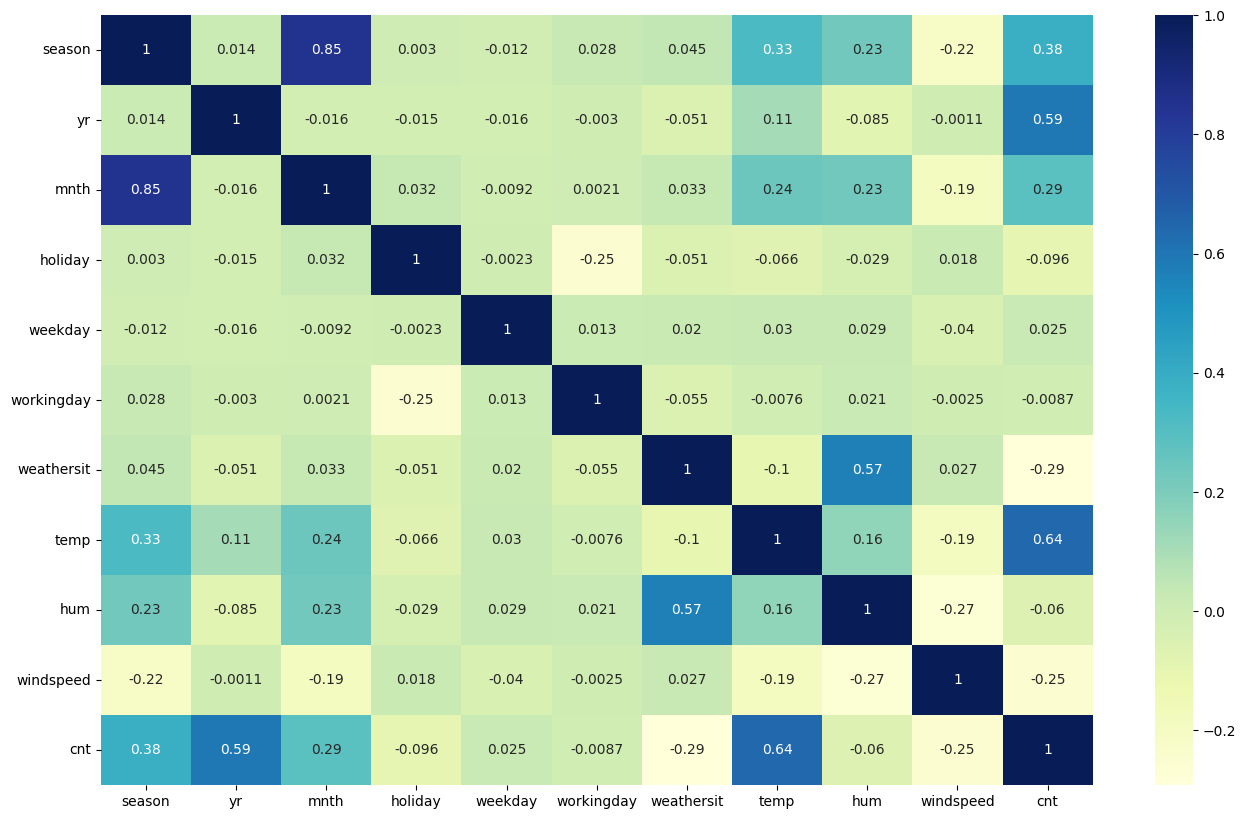

In [1175]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [1176]:
df_train[model_toolkit.c_all_cols].head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1.000000,1.0,0.818182,0.0,0.500000,1.0,0.0,0.509887,0.575354,0.300794,0.864243
1,0.666667,1.0,0.545455,0.0,0.500000,1.0,0.0,0.815169,0.725633,0.264686,0.827658
2,0.000000,1.0,0.181818,0.0,0.000000,0.0,0.5,0.442393,0.640189,0.255342,0.465255
3,0.000000,1.0,1.000000,0.0,0.166667,1.0,0.0,0.245101,0.498067,0.663106,0.204096
4,0.333333,1.0,0.272727,0.0,0.000000,0.0,0.5,0.395666,0.504508,0.188475,0.482973


In [1177]:
y_train = df_train.pop('cnt')

##### ++ All feature variables

In [1178]:
X_train = df_train
    
X_train_lm = sm.add_constant(X_train)
lr0 = sm.OLS(y_train, X_train_lm).fit() # Create a first fitted model
print(lr0.summary()) # Print a summary of the linear regression model obtained 

## Check for VIF from model_toolkit and display it

print('==============================================================================')
print('VIF is below:')
model_toolkit.check_VIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     199.5
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          3.24e-167
Time:                        03:50:03   Log-Likelihood:                 448.77
No. Observations:                 510   AIC:                            -875.5
Df Residuals:                     499   BIC:                            -829.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2345      0.031      7.453      0.0

💡`mnth` is having very high p-value

##### -- `mnth`

In [1179]:
model_cols_to_drop = ['mnth']
model_toolkit.add_cols_to_drop('mnth','high p-value')
X_train = df_train.drop(model_cols_to_drop,axis=1)
   
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit() # Create a first fitted model
print(lr1.summary()) # Print a summary of the linear regression model obtained 

## Check for VIF from model_toolkit and display it

print('==============================a================================================')
print('VIF is below:')
model_toolkit.check_VIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.9
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          2.49e-168
Time:                        03:50:03   Log-Likelihood:                 448.60
No. Observations:                 510   AIC:                            -877.2
Df Residuals:                     500   BIC:                            -834.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2330      0.031      7.436      0.0

💡`weekday` is having very high p-value

💡**Insight** - Criteria for removing:
- High p-value, high VIF
- High-low:
  - High p, low VIF: remove these first
  - Low p, high VIF: remove
- Low p, low VIF

##### -- `weekday`

In [1180]:
model_cols_to_drop = ['mnth','weekday']
model_toolkit.add_cols_to_drop('weekday','high p-value')
X_train = df_train.drop(model_cols_to_drop,axis=1)
 
X_train_lm = sm.add_constant(X_train)
lr2 = sm.OLS(y_train, X_train_lm).fit() # Create a first fitted model
print(lr2.summary()) # Print a summary of the linear regression model obtained 

## Check for VIF from model_toolkit and display it

print('==============================a================================================')
print('VIF is below:')
model_toolkit.check_VIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     249.3
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          2.86e-169
Time:                        03:50:03   Log-Likelihood:                 447.95
No. Observations:                 510   AIC:                            -877.9
Df Residuals:                     501   BIC:                            -839.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2404      0.031      7.851      0.0

💡**Insight**: 
 - Now we will remove the feature `workingday`

##### -- `workingday`

In [1181]:
model_cols_to_drop = ['mnth','weekday','workingday']
model_toolkit.add_cols_to_drop('workingday','high p-value')
X_train = df_train.drop(model_cols_to_drop,axis=1)
 
X_train_lm = sm.add_constant(X_train)
lr3 = sm.OLS(y_train, X_train_lm).fit() # Create a first fitted model
print(lr3.summary()) # Print a summary of the linear regression model obtained 

## Check for VIF from model_toolkit and display it

print('==============================a================================================')
print('VIF is below:')
model_toolkit.check_VIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     283.1
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          8.90e-170
Time:                        03:50:03   Log-Likelihood:                 446.23
No. Observations:                 510   AIC:                            -876.5
Df Residuals:                     502   BIC:                            -842.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2291      0.030      7.618      0.0

##### -- `hum`

In [1182]:
model_cols_to_drop = ['mnth','weekday','workingday','hum']
model_toolkit.add_cols_to_drop('hum','high VIF')
X_train = df_train.drop(model_cols_to_drop,axis=1)
 
X_train_lm = sm.add_constant(X_train)
lr4 = sm.OLS(y_train, X_train_lm).fit() # Create a first fitted model
print(lr4.summary()) # Print a summary of the linear regression model obtained 

## Check for VIF from model_toolkit and display it

print('==============================a================================================')
print('VIF is below:')
model_toolkit.check_VIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     325.6
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          1.21e-169
Time:                        03:50:03   Log-Likelihood:                 442.93
No. Observations:                 510   AIC:                            -871.9
Df Residuals:                     503   BIC:                            -842.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1663      0.017      9.524      0.0

##### Features dropped and reasons:

In [1183]:
model_toolkit.get_cols_to_drop(p_only_col_names=False)

[('mnth', 'high p-value'),
 ('weekday', 'high p-value'),
 ('workingday', 'high p-value'),
 ('hum', 'high VIF')]

##### Residual Analysis

In [1184]:
y_pred = lr4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

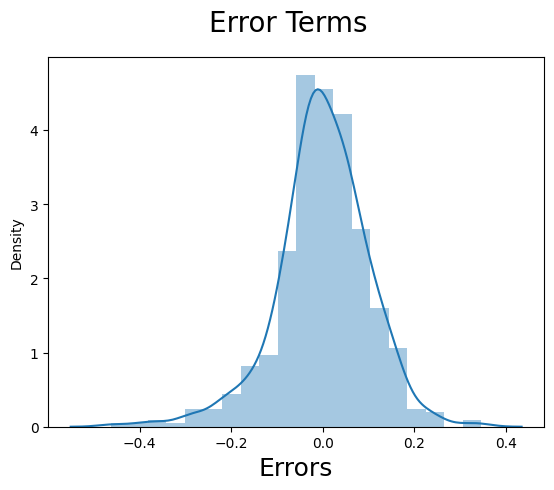

In [1185]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### Q-Q plot

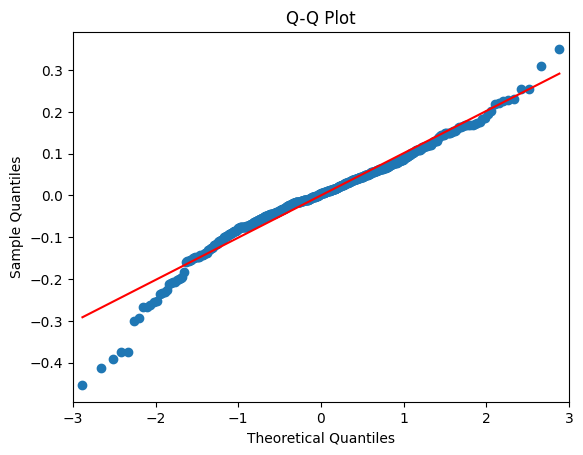

In [1214]:
# Create Q-Q Plot
sm.qqplot(y_train - y_pred,line='r')
plt.title('Q-Q Plot')
plt.show()

##### Prediction on the test set

In [1186]:
df_test[model_toolkit.c_all_cols] = scaler.transform(df_test[model_toolkit.c_all_cols])

In [1187]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.485540,0.479452,0.497717,0.036530,0.516743,0.639269,0.187215,0.558941,0.638508,0.313350,0.520592
std,0.369821,0.500722,0.311080,0.188034,0.343089,0.481313,0.269422,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.558691,0.627737,0.299459,0.524275
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [1188]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1189]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [1190]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m4 = X_test_m4.drop(model_toolkit.get_cols_to_drop(p_only_col_names=True), axis = 1)

In [1191]:
# Making predictions using the fourth model
y_pred_m4 = lr4.predict(X_test_m4)

Text(0.5, 0, 'Errors')

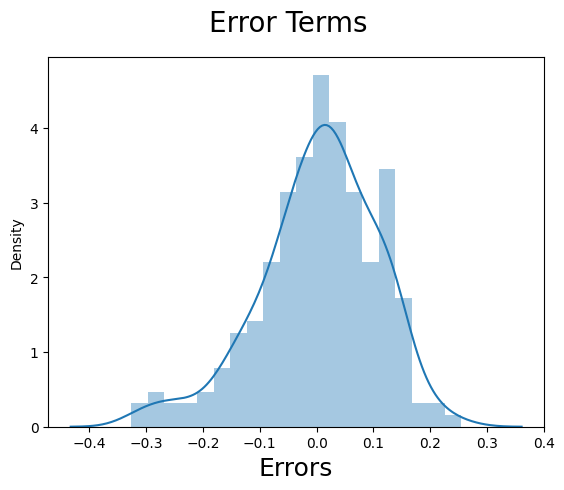

In [1192]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_m4), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

💡The major assumption of Linear Regression is that the **errors are normally distributed** and it is clearly visible from above

---

##### RFE - Recursive feature elimination

In [1193]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1194]:
df_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [1195]:
print(y_train.shape)
print(df_train.shape)

(510,)
(510, 10)


In [1196]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()

y_train = y_train
X_train = df_train
lm.fit(X_train, y_train)

LinearRegression()

In [1197]:
rfe = RFE(lm, n_features_to_select=6)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1198]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', False, 2),
 ('weekday', False, 5),
 ('workingday', False, 3),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [1199]:
col = X_train.columns[rfe.support_]
col

Index(['season', 'yr', 'weathersit', 'temp', 'hum', 'windspeed'], dtype='object')

In [1200]:
X_train.columns[~rfe.support_]

Index(['mnth', 'holiday', 'weekday', 'workingday'], dtype='object')

In [1201]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1202]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1203]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [1204]:
#Let's see the summary of our linear model using RFE
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     322.2
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          9.82e-169
Time:                        03:50:05   Log-Likelihood:                 440.80
No. Observations:                 510   AIC:                            -867.6
Df Residuals:                     503   BIC:                            -838.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2254      0.030      7.429      0.0

##### Prediction using the above model

In [1205]:
y_pred = lm.predict(X_train_rfe)

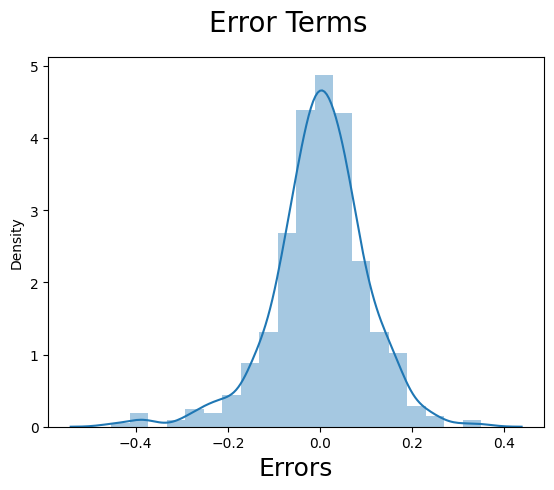

In [1210]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

💡The major assumption of Linear Regression is that the **errors are normally distributed** and it is clearly visible from above

---

#### 💡Insights - Using Manual Feature Elimiation:
   - The R-Squared of Manual Feature Elimiation was : **0.795**
   - Features in the model were: ['temp', 'season', 'windspeed', 'yr', 'weathersit', 'holiday']
   - Features dropped were: [('mnth', 'high p-value'), ('weekday', 'high p-value'), ('workingday', 'high p-value'), ('hum', 'high VIF')]

#### 💡Insights - Using RFE (Recursive Feature Elimination):
   - The R-Squared was : **0.794**
   - Features in the model were: ['season', 'yr', 'weathersit', 'temp', 'hum', 'windspeed']
   - Features dropped were: ['mnth', 'holiday', 'weekday', 'workingday']

---

#### 2.2.🧑‍💻🎯Model Evaluation (25%):
When you're done with:
 - model building
 - residual analysis 
 - Predictions on the test set
 
Just make sure you use the following two lines of code to calculate the R-squared score on the test set.

``` Python
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
```
 
where, 
 - `y_test` is the test data set for the target variable, and 
 - `y_pred` is the variable containing the predicted values of the target variable on the test set.

💡**Note**: Please don't forget to perform this step as the R-squared score on the test set holds some marks. 

The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

##### Plot the y_test Vs y_pred_m4 model

Text(0, 0.5, 'y_pred_m4')

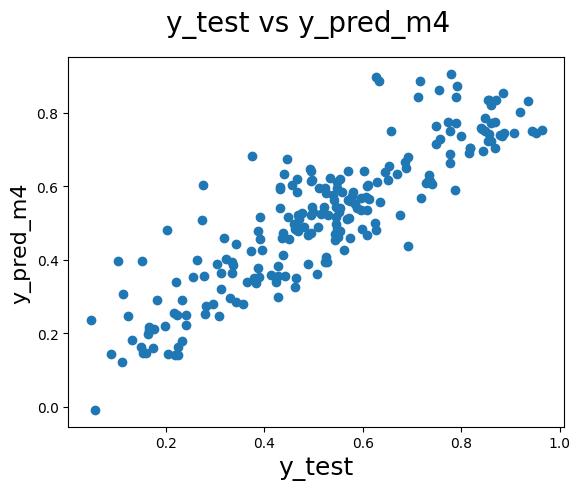

In [1207]:
# Plotting y_test and y_pred_m4 to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred_m4', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_m4', fontsize = 16)      

##### Get the r2_score of the model using Manual Feature Elimination

In [1208]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.7730769910986954

##### Get the equation of the model

In [1209]:
model_toolkit.get_model_ols_params(lr4)

const         0.166303
season        0.126584
yr            0.235810
holiday      -0.095565
weathersit   -0.187021
temp          0.467522
windspeed    -0.148497
dtype: float64


*cnt = 0.166303 + 0.126584 ∗ season + 0.235810 ∗ yr - 0.095565 * holiday - 0.187021 * weathersit + 0.467522 * temp - 0.148497 * windspeed*

### 🎯Conclusion and Business Insights:
- **Inventory Management** - The above multiple linear regression equation helps the business to maintain sufficient inventory of bikes depedning on **cyclic factors** such as *season, weathersit, holiday, yr* in long term and short term
- **Maintenance Window** - *BoomBikes* can plan their maintenance of bikes by **replacing tyres and servicing** for winter and colder weather and additionally providing *wintor gears*.
- **Discount** - Factors like *holiday*, *weathersit* and *windspeed* are having inverse effect on the overall users. This can be lead to more vehicles stationed. Offering some discount on *holiday* can bring in more customers


---

### 3️⃣📝Coding Guidelines (5%):

✅Meets expectations
 - Appropriate comments are written wherever applicable.
 - If new variables are created, the names are descriptive and unambiguous.
 - The code is written concisely wherever possible.
 - Overall, code readability is good with appropriate indentations.

❌Does not meet expectations
 - Comments are not written rendering the code difficult to understand.
 - Variables are poorly or ambiguously named.
 - The code is more complex than what is required by the problem.
 - Code readability is poor because of poor indentation / other reasons.


 ---

## 4️⃣✍️Subjective Questions (20%):

✅Meets expectations
 - The answers are correct, concise, and to the point.
 - Examples are provided wherever necessary.

❌Does not meet expectations
 - The answers are incorrect or unnecessarily long.
 - Appropriate examples are not provided in places where required. 

### ⏩Assignment-Based Subjective Questions
Please refer the [Assignment PDF](Bike-Sharing-Assignment-Subjective-Questions.pdf)

### ⏩Answers for General Subjective Questions 

Please refer the [Assignment PDF](Bike-Sharing-Assignment-Subjective-Questions.pdf)


 ---

## 💼Submissions:

 - **Python Notebook**: One Python notebook with the whole linear model, predictions, and evaluation. [Bike-Sharing-Assignment](3.Bike-Sharing-Assignment.ipynb)
 - **Subjective Questions PDF**: Apart from the Python notebook, you also need to answer some subjective questions related to linear regression which can be downloaded from the file below. Answer these questions and submit it as a PDF. [Subjective Questions PDF](Bike-Sharing-Assignment-Subjective-Questions.pdf)

💡`Note`: There are some questions in the subjective questions doc that you might not be familiar with. So you're expected to research these questions and give an appropriate answer in order to expand your learnings of this topic.

---

## 📖References:
The dataset and data dictionary can be get from link given below:

 - [Bike Sharing Dataset](./3.1.BikeSharing-Dataset.csv)
 - [Assignment - Data Dictionary](./3.1.BiketSharing-DataDictinary.md)

---
